## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

## Task
Which teams scored the largest number of goals in FIFA World Cup?

In [350]:
# import packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime

In [351]:
data = pd.read_csv('results.csv', sep= ',')

In [352]:
data.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


In [353]:
data[data['tournament'] == 'FIFA World Cup']

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1304,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True
1305,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1306,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True
1307,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True
1308,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True
...,...,...,...,...,...,...,...,...,...
39945,2018-07-07,Russia,Croatia,2,2,FIFA World Cup,Sochi,Russia,False
39946,2018-07-10,France,Belgium,1,0,FIFA World Cup,St. Petersburg,Russia,True
39947,2018-07-11,Croatia,England,2,1,FIFA World Cup,Moscow,Russia,True
39948,2018-07-14,Belgium,England,2,0,FIFA World Cup,St. Petersburg,Russia,True


In [354]:
goals_home = data.groupby('home_team', as_index=False).agg({'home_score' : 'sum'})
goals_away = data.groupby('away_team', as_index=False).agg({'away_score' : 'sum'})

In [355]:
goals = goals_home.merge(right = goals_away, how = 'inner', left_on= 'home_team', right_on = 'away_team')

In [356]:
goals['total'] = goals['home_score'] + goals['away_score']
goals.sort_values('total', ascending=False)

five_large = goals.sort_values('total', ascending=False).head(5)

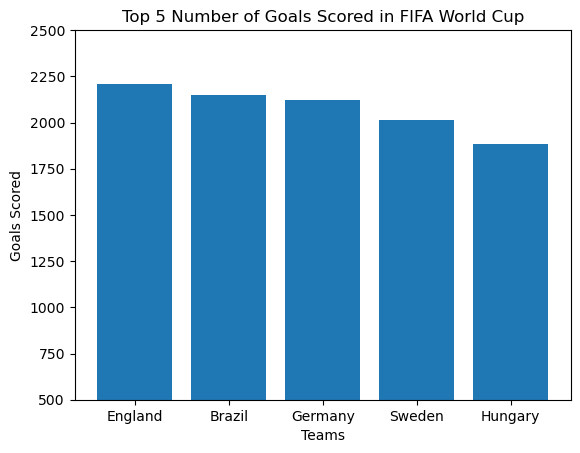

In [357]:
plt.bar(five_large['home_team'], five_large['total'])
plt.xlabel('Teams')
plt.ylabel('Goals Scored')
plt.title('Top 5 Number of Goals Scored in FIFA World Cup')
plt.ylim(500,2500)
plt.show()

## Task
What is the number of matches played in each tournament throughout history?

In [358]:
num_match = data.groupby('tournament')['tournament'].count().reset_index(name ='count')
five_large = num_match.sort_values('count', ascending=False).head(5)

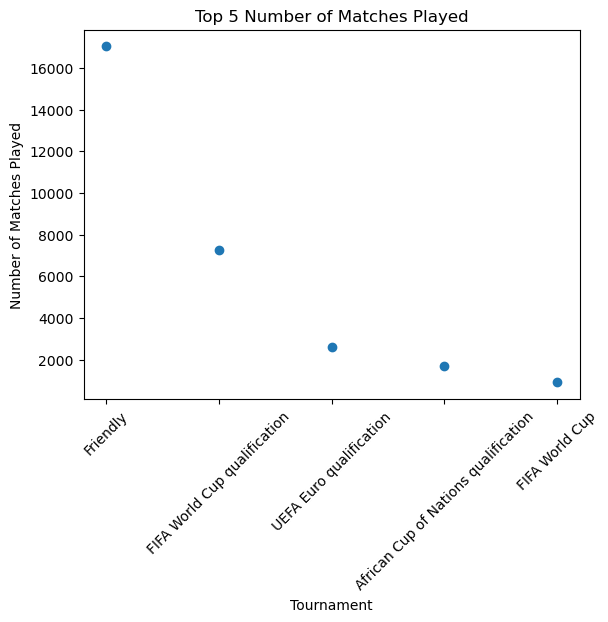

In [359]:
plt.scatter(five_large['tournament'], five_large['count'])
plt.xlabel('Tournament')
plt.ylabel('Number of Matches Played')
plt.title('Top 5 Number of Matches Played')
plt.xticks(rotation=45)
plt.show()

## Task 
Show the trend in number of matches per year.

In [360]:
data['date'] = pd.to_datetime(data['date'])

In [361]:
data.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [362]:
data['year'] = data['date'].dt.year

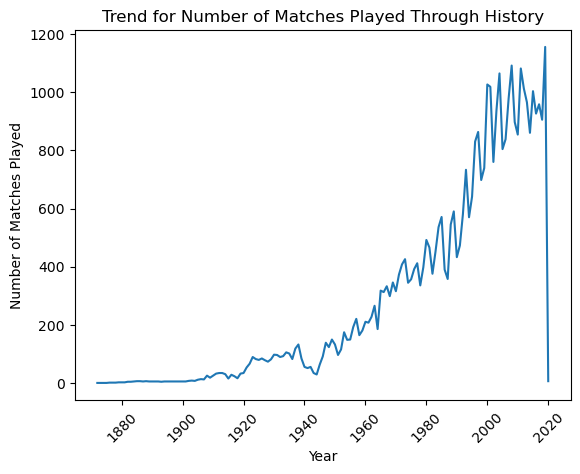

In [363]:
num_match = data.groupby('year')['year'].count().reset_index(name ='count')
plt.plot(num_match['year'], num_match['count'])
plt.xlabel('Year')
plt.ylabel('Number of Matches Played')
plt.title('Trend for Number of Matches Played Through History')
plt.xticks(rotation=45)
plt.show()

## Task
Which teams are the most successful ones? (winning percentage)

In [364]:
# create new column that quickly shows which team won (home vs away), where 0 = home won, 1 = away won, 2 = tie
condition = [
    (data['home_score'] > data['away_score']),
    (data['home_score'] < data['away_score']),
    (data['home_score'] == data['away_score'])
]
code = [0, 1, 2]

data['who_won'] = np.select(condition, code)
data.head(3)
data[data['home_team'] == 'Zimbabwe']
data[data['away_team'] == 'Zimbabwe']

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,who_won
2654,1947-02-22,Zambia,Zimbabwe,2,2,Friendly,Kitwe,Northern Rhodesia,False,1947,2
3139,1950-07-16,Zambia,Zimbabwe,3,2,Friendly,Kitwe,Northern Rhodesia,False,1950,0
3363,1952-09-06,Zambia,Zimbabwe,1,4,Friendly,Kitwe,Northern Rhodesia,False,1952,1
3365,1952-09-11,Zambia,Zimbabwe,3,2,Friendly,Kitwe,Northern Rhodesia,False,1952,0
3549,1953-10-14,Zambia,Zimbabwe,1,0,Friendly,Kitwe,Northern Rhodesia,False,1953,0
...,...,...,...,...,...,...,...,...,...,...,...
40868,2019-06-26,Uganda,Zimbabwe,1,1,African Cup of Nations,Cairo,Egypt,True,2019,2
40969,2019-07-29,Mauritius,Zimbabwe,0,4,African Nations Championship qualification,Centre de Flacq,Mauritius,False,2019,1
41045,2019-09-05,Somalia,Zimbabwe,1,0,FIFA World Cup qualification,Djibouti,Djibouti,True,2019,0
41366,2019-10-20,Lesotho,Zimbabwe,0,0,African Nations Championship qualification,Lesotho,Lesotho,False,2019,2


In [365]:
# make a list for teams
teams_list = np.unique(data[['home_team','away_team']].values)
wins = pd.DataFrame(teams_list, columns = ['team'])

In [366]:
wins = wins.merge(data.groupby('home_team')['home_team'].count().reset_index(name='count'), left_on='team', right_on= 'home_team', how ='left')
wins.rename(columns={'count':'home_played'}, inplace=True)
wins = wins.merge(data.groupby('away_team')['away_team'].count().reset_index(name='count'), left_on='team', right_on= 'away_team', how ='left')
wins.rename(columns={'count':'away_played'}, inplace=True)
wins.drop(labels = ['home_team', 'away_team'], inplace= True, axis = 1)
wins.fillna(0)

,team,home_played,away_played
0,Abkhazia,18.0,10.0
1,Afghanistan,40.0,71.0
2,Albania,175.0,157.0
3,Alderney,7.0,12.0
4,Algeria,292.0,213.0
...,...,...,...
307,Yugoslavia,190.0,290.0
308,Zambia,300.0,418.0
309,Zanzibar,58.0,147.0
310,Zimbabwe,190.0,266.0


In [367]:
wins['total_played'] = wins['home_played'] + wins['away_played']

In [368]:
wins

,team,home_played,away_played,total_played
0,Abkhazia,18.0,10.0,28.0
1,Afghanistan,40.0,71.0,111.0
2,Albania,175.0,157.0,332.0
3,Alderney,7.0,12.0,19.0
4,Algeria,292.0,213.0,505.0
...,...,...,...,...
307,Yugoslavia,190.0,290.0,480.0
308,Zambia,300.0,418.0,718.0
309,Zanzibar,58.0,147.0,205.0
310,Zimbabwe,190.0,266.0,456.0


In [369]:
condition = [
    (data['who_won'] == 0),
    (data['who_won'] == 1)
]
code = [data['home_team'], data['away_team']]

data['team_won'] = np.select(condition, code)

In [370]:
data.groupby('team_won')['team_won'].count().reset_index(name='count')

,team_won,count
0,0,9578
1,Abkhazia,12
2,Afghanistan,30
3,Albania,84
4,Alderney,3
...,...,...
296,Yugoslavia,223
297,Zambia,328
298,Zanzibar,41
299,Zimbabwe,189


In [371]:
wins = wins.merge(data.groupby('team_won')['team_won'].count().reset_index(name='count'), left_on='team', right_on= 'team_won', how ='left')
wins.drop('team_won', inplace=True, axis = 1)
wins.rename(columns={'count':'games_won'}, inplace=True)

In [378]:
wins['win_percentage'] = wins['games_won'] / wins['total_played'] * 100
highest_wins = wins.nlargest(10, columns ='win_percentage')

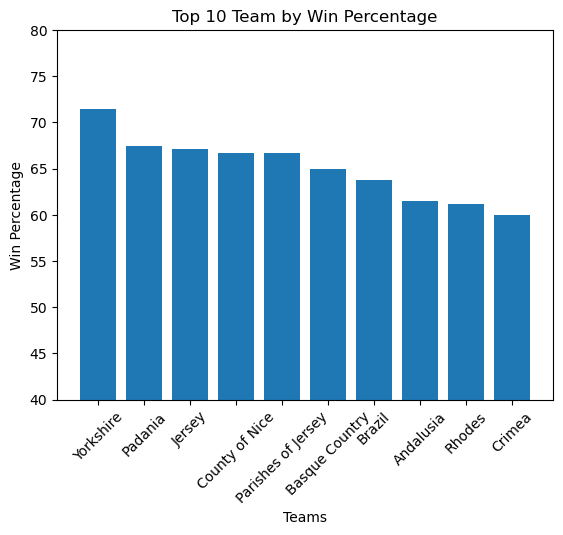

In [384]:
plt.bar(highest_wins['team'], highest_wins['win_percentage'])
plt.xlabel('Teams')
plt.ylabel('Win Percentage')
plt.title('Top 10 Team by Win Percentage')
plt.ylim(40,80)
plt.xticks(rotation = 45)
plt.show()

## Task
Which teams are the least successful ones? (winning percentage)

In [387]:
lowest_wins = wins.drop().nsmallest(10, columns ='win_percentage')

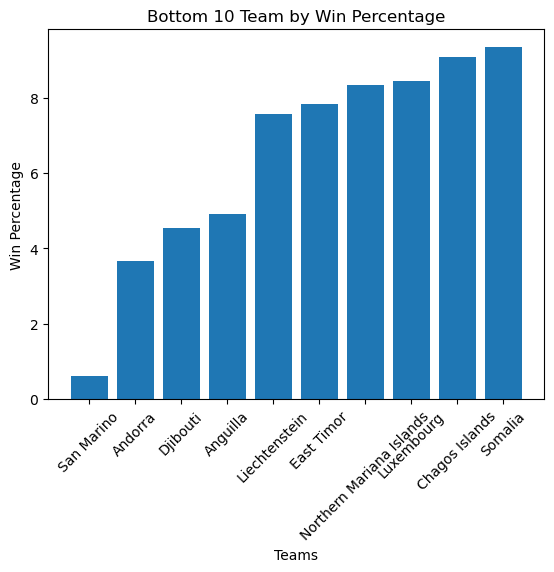

In [389]:
plt.bar(lowest_wins['team'], lowest_wins['win_percentage'])
plt.xlabel('Teams')
plt.ylabel('Win Percentage')
plt.title('Bottom 10 Team by Win Percentage')
plt.xticks(rotation = 45)
plt.show()

## Task
Which months through the history had more matches? Is it June, July, or others? Does the number of matches change from month to month?

In [390]:
data['month'] = data['date'].dt.month

In [394]:
months = data.groupby('month',)['month'].count().reset_index(name='count')

In [395]:
months

,month,count
0,1,2218
1,2,2564
2,3,4039
3,4,2538
4,5,3231
5,6,5969
6,7,2770
7,8,2752
8,9,4296
9,10,4642


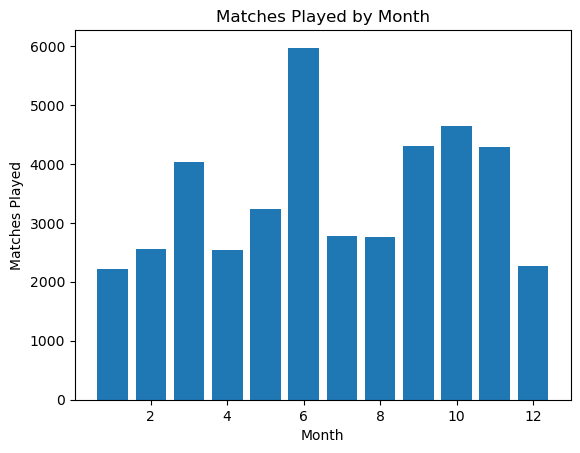

In [397]:
plt.bar(months['month'], months['count'])
plt.xlabel('Month')
plt.ylabel('Matches Played')
plt.title('Matches Played by Month')
plt.show()

Most games played in June, Summer game, makes sense it would be in the summer. 

## Task
Which teams played against each other the most?

In [406]:
data.groupby(['home_team', 'away_team'])['home_team'].value_counts().nlargest(5)

home_team  away_team  home_team
Argentina  Uruguay    Argentina    96
Uruguay    Argentina  Uruguay      80
Austria    Hungary    Austria      68
Hungary    Austria    Hungary      65
Kenya      Uganda     Kenya        65
Name: home_team, dtype: int64

## Task
Apply your creativity to show some additional insights from the data.

## Task (Stretch)
Create these graphs in Tableau as well.